In [1]:
import pandas as  pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectFromModel
from Selection import embedded_method as em

C:\Users\Ut Luom\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Ut Luom\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

In [5]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data.target, test_size=0.2, random_state=42)

In [9]:
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


# RandomForest Classifier


Feature ranking:
1. feature no: 27. feature name: worst concave points (0.162740)
2. feature no: 22. feature name: worst perimeter (0.132371)
3. feature no: 7. feature name: mean concave points (0.116818)
4. feature no: 20. feature name: worst radius (0.111715)
5. feature no: 23. feature name: worst area (0.085947)
6. feature no: 6. feature name: mean concavity (0.055174)
7. feature no: 13. feature name: area error (0.042121)
8. feature no: 3. feature name: mean area (0.032309)
9. feature no: 26. feature name: worst concavity (0.029567)
10. feature no: 10. feature name: radius error (0.028677)
11. feature no: 0. feature name: mean radius (0.027347)
12. feature no: 2. feature name: mean perimeter (0.022244)
13. feature no: 28. feature name: worst symmetry (0.019603)
14. feature no: 1. feature name: mean texture (0.015979)
15. feature no: 24. feature name: worst smoothness (0.012812)
16. feature no: 21. feature name: worst texture (0.012528)
17. feature no: 12. feature name: perimeter er

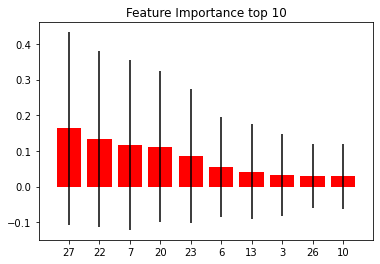

In [7]:
model = em.rf_importance(X_train=X_train, y_train=y_train, max_depth=10, top_n=10)

In [8]:
# chọn những feature lớn hơn ngưỡng
feature_selection = SelectFromModel(model, threshold=0.05, prefit=True)
select_feature = X_train.columns[(feature_selection.get_support())]
select_feature

Index(['mean concavity', 'mean concave points', 'worst radius',
       'worst perimeter', 'worst area', 'worst concave points'],
      dtype='object')

chỉ có 5 feature có ngưỡng lớn hơn 0.05

In [11]:
feature_selection2 = SelectFromModel(model, threshold='2*median', prefit=True)
select_feature2 = X_train.columns[(feature_selection2.get_support())]
select_feature2

Index(['mean radius', 'mean area', 'mean concavity', 'mean concave points',
       'radius error', 'area error', 'worst radius', 'worst perimeter',
       'worst area', 'worst concavity', 'worst concave points'],
      dtype='object')

có 11 feature có tầm quan trọng > 2 lần giá trị trung bình